In [ ]:
#upload google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
image_directory  = '/content/drive/MyDrive/cat & dog dataset/dataset'

SIZE = 150
dataset = []
label = []

In [ ]:
import os
import cv2
from PIL import Image
import numpy as np

In [ ]:
cats_images = os.listdir('/content/drive/MyDrive/cat & dog dataset/dataset/cats/')
for i, image_name in enumerate(cats_images):

    if (image_name.split('.')[1] == 'jpg'):
        image = cv2.imread(f'{image_directory}/cats/{image_name}')
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image))
        label.append(0)

In [ ]:
dogs_images = os.listdir(f'{image_directory}/dogs/')
for i, image_name in enumerate(dogs_images):
    if (image_name.split('.')[1] == 'jpg'):
        image = cv2.imread(f'{image_directory}/dogs/{image_name}')
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image))
        label.append(1)

In [ ]:
dataset = np.array(dataset)
label = np.array(label)

In [ ]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(dataset, label, test_size = 0.20, random_state = 0)


In [ ]:
import matplotlib.image as mpimg
import os
import cv2
from PIL import Image
import numpy as np
#importing liberaries
import tensorflow.keras as tf
from tensorflow.keras.models import Model

from tensorflow.keras.layers import Input ,Dense, Activation,Flatten,Conv2D,MaxPool2D,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras import metrics
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
#define input imge
inputshape = (150,150,3)

#input layer
img_input=Input(shape =inputshape ,name='inputimage')
#convo layers kol layer 3bara 3n e7
x = Conv2D(128,(3,3),padding='same',activation='relu',name = 'layer1')(img_input)
x = Conv2D(64,(3,3),padding='same',activation='relu',name = 'layer2')(x)
x = MaxPool2D((2,2),strides=(2,2),name = 'layer3')(x)
x = Dropout(0.25)(x)


x = Conv2D(64,(3,3),padding='same',activation='relu',name = 'layer4')(x)
x = MaxPool2D((2,2),strides=(2,2),name = 'layer5')(x)
x = Dropout(0.2)(x)

x = Conv2D(128,(3,3),padding='same',activation='relu',name = 'layer6')(x)
x = MaxPool2D((2,2),strides=(2,2),name = 'layer7')(x)
x = Dropout(0.25)(x)


x = Flatten(name = 'fc1')(x)
x = Dense(256,activation='relu', name = 'layer8')(x)
x = Dense(500,activation='relu', name = 'layer9')(x)
x = Dropout(0.5)(x)
x = Dense(1,activation='sigmoid',name='predection')(x)

In [ ]:
#generate model
model = Model(inputs =img_input,outputs = x, name = 'caner_or_not' )

In [ ]:
#print network structure
model.summary()

Model: "cat_and_dog"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputimage (InputLayer)     [(None, 150, 150, 3)]     0         
                                                                 
 layer1 (Conv2D)             (None, 150, 150, 128)     3584      
                                                                 
 layer2 (Conv2D)             (None, 150, 150, 64)      73792     
                                                                 
 layer3 (MaxPooling2D)       (None, 75, 75, 64)        0         
                                                                 
 dropout (Dropout)           (None, 75, 75, 64)        0         
                                                                 
 layer4 (Conv2D)             (None, 75, 75, 64)        36928     
                                                                 
 layer5 (MaxPooling2D)       (None, 37, 37, 64)        

In [ ]:
from keras.callbacks import EarlyStopping
earlystop = EarlyStopping(patience=10)

In [ ]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)

In [ ]:
#compiling the model
model.compile(optimizer='adam',loss=binary_crossentropy, metrics=['accuracy'] )

In [ ]:
from tensorflow.keras.models import Model
history = model.fit(X_train,
                         y_train,
                         batch_size = 32,
                         verbose = 1,
                         epochs = 100,
                         validation_data=(X_test,y_test),
                         shuffle = False,
                         callbacks=earlystop

                     )

Epoch 1/100
4/4 [==============================] - 18s 1s/step - loss: 150.6246 - accuracy: 0.5000 - val_loss: 6.5027 - val_accuracy: 0.5000
Epoch 2/100
4/4 [==============================] - 1s 133ms/step - loss: 8.5686 - accuracy: 0.5357 - val_loss: 0.7447 - val_accuracy: 0.5000
Epoch 3/100
4/4 [==============================] - 1s 146ms/step - loss: 1.0264 - accuracy: 0.5000 - val_loss: 0.6912 - val_accuracy: 0.5000
Epoch 4/100
4/4 [==============================] - 1s 145ms/step - loss: 0.7123 - accuracy: 0.5804 - val_loss: 0.6911 - val_accuracy: 0.5000
Epoch 5/100
4/4 [==============================] - 1s 144ms/step - loss: 0.7022 - accuracy: 0.4554 - val_loss: 0.6923 - val_accuracy: 0.5000
Epoch 6/100
4/4 [==============================] - 1s 134ms/step - loss: 0.6943 - accuracy: 0.5089 - val_loss: 0.6924 - val_accuracy: 0.5000
Epoch 7/100
4/4 [==============================] - 1s 137ms/step - loss: 0.6881 - accuracy: 0.5625 - val_loss: 0.6925 - val_accuracy: 0.6429
Epoch 8/100
4

In [ ]:
model.save('binary_classification')

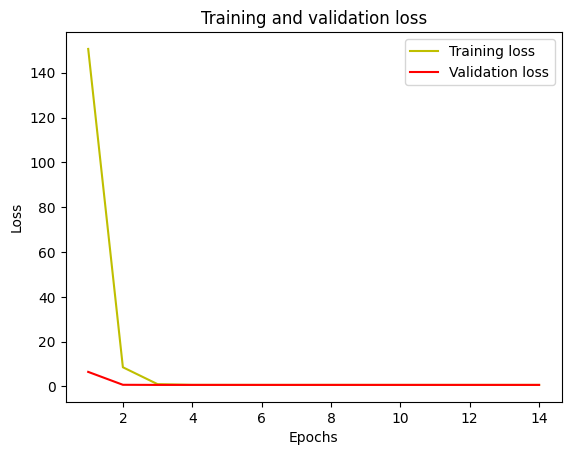

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

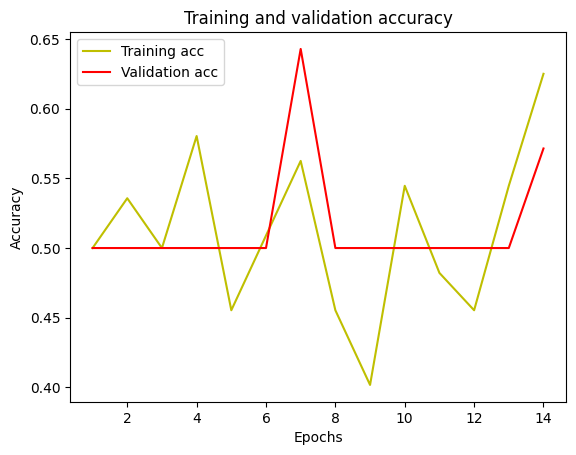

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
plt.plot(epochs, accuracy, 'y', label='Training acc')
plt.plot(epochs, val_accuracy, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:

_, acc = model.evaluate(X_test, y_test)
print("Accuracy = ", (acc * 100.0), "%")

1/1 [==============================] - 0s 75ms/step - loss: 0.6931 - accuracy: 0.5714
Accuracy =  57.14285969734192 %


In [ ]:
acc = model.evaluate(X_test, y_test)
print((acc * 100))

1/1 [==============================] - 0s 70ms/step - loss: 0.6931 - accuracy: 0.5714
[0.6930779814720154, 0.5714285969734192, 0.6930779814720154, 0.5714285969734192, 0.6930779814720154, 0.5714285969734192, 0.6930779814720154, 0.5714285969734192, 0.6930779814720154, 0.5714285969734192, 0.6930779814720154, 0.5714285969734192, 0.6930779814720154, 0.5714285969734192, 0.6930779814720154, 0.5714285969734192, 0.6930779814720154, 0.5714285969734192, 0.6930779814720154, 0.5714285969734192, 0.6930779814720154, 0.5714285969734192, 0.6930779814720154, 0.5714285969734192, 0.6930779814720154, 0.5714285969734192, 0.6930779814720154, 0.5714285969734192, 0.6930779814720154, 0.5714285969734192, 0.6930779814720154, 0.5714285969734192, 0.6930779814720154, 0.5714285969734192, 0.6930779814720154, 0.5714285969734192, 0.6930779814720154, 0.5714285969734192, 0.6930779814720154, 0.5714285969734192, 0.6930779814720154, 0.5714285969734192, 0.6930779814720154, 0.5714285969734192, 0.6930779814720154, 0.57142859697

In [ ]:
predictions = model.predict(X_test)

1/1 [==============================] - 0s 197ms/step


In [ ]:
import numpy as np
np.argmax(predictions[5])

0

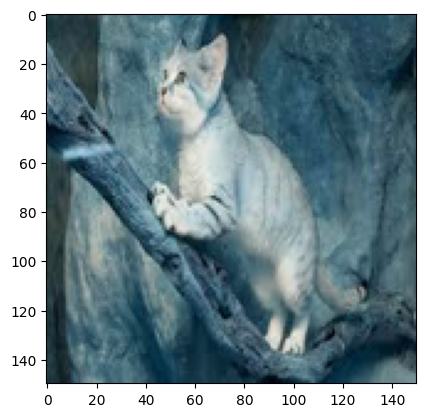

In [ ]:
plt.imshow(X_test[5])

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
y_pred = model.predict(X_test)

1/1 [==============================] - 0s 35ms/step


In [ ]:
cm = confusion_matrix(y_test,y_pred.round())

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

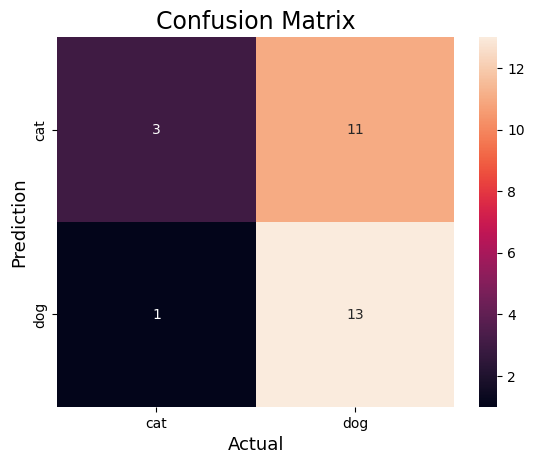

In [ ]:
#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['cat', 'dog'],
            yticklabels=['cat', 'dog'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [ ]:
accuracy = accuracy_score(y_test, y_pred.round())
print("Accuracy   :", accuracy)

Accuracy   : 0.5714285714285714


In [ ]:
precision = precision_score(y_test, y_pred.round())
print("Precision :", precision)

Precision : 0.5416666666666666


In [ ]:
recall = recall_score(y_test, y_pred.round())
print("Recall    :", recall)

Recall    : 0.9285714285714286


In [ ]:
F1_score = f1_score(y_test, y_pred.round())
print("F1-score  :", F1_score)

F1-score  : 0.6842105263157894
